# Read the DataSet:

In [1]:
import pandas as pd
import numpy as np

data_set = pd.read_csv('/kaggle/input/churn-dataset/p01_bank_data/bank_data_train.csv')
data_set.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clean The NonNumerical columns and filling the empty rows with 0.

In [2]:
data_set.fillna(0, inplace=True)
DataFrame = data_set.select_dtypes(include=['number'])
DataFrame = DataFrame.loc[:, DataFrame.mean() != 0]
DataFrame.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.105225,0.039293,8.685129,0.001305,0.090508,0.090004,0.076051,0.215444,0.000723,...,0.007309,0.014841,0.006763,0.013804,0.002493,0.004309,0.003667,0.003667,0.003667,0.081435
std,128148.804566,0.431372,0.103339,21.163760,0.029118,0.226467,0.232604,0.136991,0.361256,0.014081,...,0.066681,0.114712,0.060431,0.100218,0.048342,0.059852,0.050181,0.050181,0.050181,0.273503
min,146841.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.028539,0.000000,0.000000,0.000000,0.000000,0.095284,0.388982,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removing the Converged Columns from the DataFrame:

In [3]:
ConvergedColumns = DataFrame.var()[DataFrame.var() < 1e-5].index
DataFrame.drop(columns = ConvergedColumns, inplace = True)
DataFrame.drop(columns = 'ID', inplace = True)
DataFrame.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,0.105225,0.039293,8.685129,0.001305,0.090508,0.090004,0.076051,0.215444,0.000723,0.216264,...,0.007309,0.014841,0.006763,0.013804,0.002493,0.004309,0.003667,0.003667,0.003667,0.081435
std,0.431372,0.103339,21.163760,0.029118,0.226467,0.232604,0.136991,0.361256,0.014081,0.356002,...,0.066681,0.114712,0.060431,0.100218,0.048342,0.059852,0.050181,0.050181,0.050181,0.273503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015921,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.028539,0.000000,0.000000,0.000000,0.000000,0.095284,0.388982,0.000000,0.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Remove the unnecessary Data:

In [4]:
ColumnsToRemove = ['AGE']
DataFrame.drop(columns = ColumnsToRemove, inplace = True)

# Remove Duplicate Rows:

In [5]:
DataFrame.drop_duplicates(inplace=True)

# Plot the Churned Data percentage:

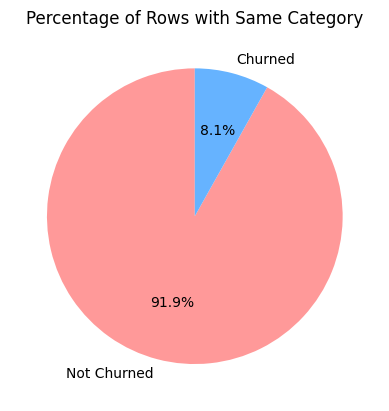

In [6]:
import matplotlib.pyplot as plt

churned_counts = DataFrame['TARGET'].value_counts() * 100
churned_counts = churned_counts.rename({0: 'Not Churned', 1: 'Churned'})

churned_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Percentage of Rows with Same Category")
plt.ylabel('')
plt.show()

# Balance The DataFrame:

In [7]:
from sklearn.preprocessing import StandardScaler

def getDataSplit():
    # Balance The DataSet:
    TrueValues = DataFrame['TARGET']
    ChurnedValues = TrueValues[TrueValues == 1]
    NonChurnedValues = TrueValues[TrueValues == 0]
    BalancedNonChurnValues = NonChurnedValues.sample(n=len(ChurnedValues), random_state=42)
    y_values = pd.concat([ChurnedValues, BalancedNonChurnValues])
    x_values = DataFrame.drop(columns='TARGET').loc[y_values.index]
    # TODO: Need to Normalize x_value
    scaler = StandardScaler()
    x_values = pd.DataFrame(scaler.fit_transform(x_values), columns=x_values.columns)

    return x_values, y_values


# Commun Imports:

In [8]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Stochastic Classifier(Basic Classifier):

In [9]:
from sklearn.linear_model import SGDClassifier

x_values, y_values = getDataSplit()
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42) # Split to 20% test

param_grid = {
    'loss': ['log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', None],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-3],
    'random_state': [42],
}

sgd = SGDClassifier()
sgd_grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1)
sgd_grid_search.fit(X_train, y_train)

best_sgd_model = sgd_grid_search.best_estimator_

y_pred = best_sgd_model.predict(X_test)

# Accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Stochatic Gradient Descent Accuracy: {rf_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(sgd_grid_search.best_params_)

Stochatic Gradient Descent Accuracy: 0.6638
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      5869
           1       0.63      0.75      0.69      5687

    accuracy                           0.66     11556
   macro avg       0.67      0.67      0.66     11556
weighted avg       0.67      0.66      0.66     11556

Best Hyperparameters from Grid Search:
{'loss': 'log_loss', 'max_iter': 500, 'penalty': 'l1', 'random_state': 42, 'tol': 0.001}


# Random forest Classifier:

In [10]:
from sklearn.ensemble import RandomForestClassifier

x_values, y_values = getDataSplit()
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42) # Split to 20% test

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(rf_grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Random Forest Accuracy: 0.7602
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      5869
           1       0.73      0.82      0.77      5687

    accuracy                           0.76     11556
   macro avg       0.76      0.76      0.76     11556
weighted avg       0.76      0.76      0.76     11556

Best Hyperparameters from Grid Search:
{'max_depth': 10, 'max_features': None, 'n_estimators': 200}


# MLPClassifier:

In [11]:
from sklearn.neural_network import MLPClassifier

x_values, y_values = getDataSplit()
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42) # Split to 20% test

param_grid = {
    'hidden_layer_sizes': [20, 25],
    'activation': ['logistic', 'relu'],
    'learning_rate': ['constant', 'invscaling'],
    'max_iter': [1500, 2000]
}

mlp = MLPClassifier()
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_train, y_train)

best_mlp_model = mlp_grid_search.best_estimator_

y_pred = best_mlp_model.predict(X_test)

# Accuracy of the model
mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"MultiLayer Perceptron Accuracy: {mlp_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(mlp_grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
MultiLayer Perceptron Accuracy: 0.7484
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      5869
           1       0.72      0.80      0.76      5687

    accuracy                           0.75     11556
   macro avg       0.75      0.75      0.75     11556
weighted avg       0.75      0.75      0.75     11556

Best Hyperparameters from Grid Search:
{'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'invscaling', 'max_iter': 2000}


# Keras Classifier:

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

x_values, y_values = getDataSplit()
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42) # Split to 20% test

keras_model = Sequential()
keras_model.add(Input(shape=(X_train.shape[1],)))
keras_model.add(Dense(128, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
y_pred = keras_model.predict(X_test)
history = keras_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Accuracy of the model
loss, accuracy = keras_model.evaluate(X_test, y_test)
print(f"Keras Accuracy: {accuracy:.4f}")

y_pred = keras_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6480 - loss: 0.6265 - val_accuracy: 0.6877 - val_loss: 0.5779
Epoch 2/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7042 - loss: 0.5623 - val_accuracy: 0.7096 - val_loss: 0.5539
Epoch 3/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7224 - loss: 0.5406 - val_accuracy: 0.7141 - val_loss: 0.5464
Epoch 4/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7257 - loss: 0.5304 - val_accuracy: 0.7160 - val_loss: 0.5444
Epoch 5/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7354 - loss: 0.5184 - val_accuracy: 0.7250 - val_loss: 0.5402
Epoch 6/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7435 - loss: 0.5094 - val_accuracy: 0.7210 - val_loss: 0.5430
Epoch 7/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7490 - loss: 0.4989 - val_accuracy: 0.7271 - val_loss: 0.5398
Epoch 8/50
2312/2312 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/

# Plot the learning curve for Keras

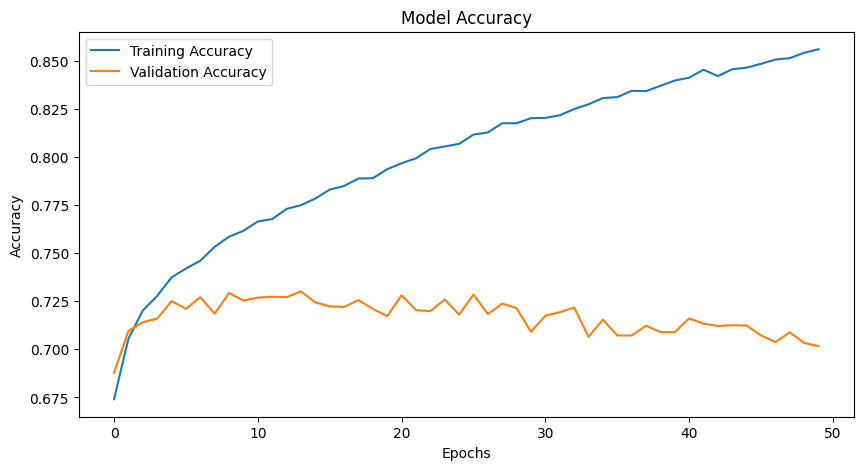

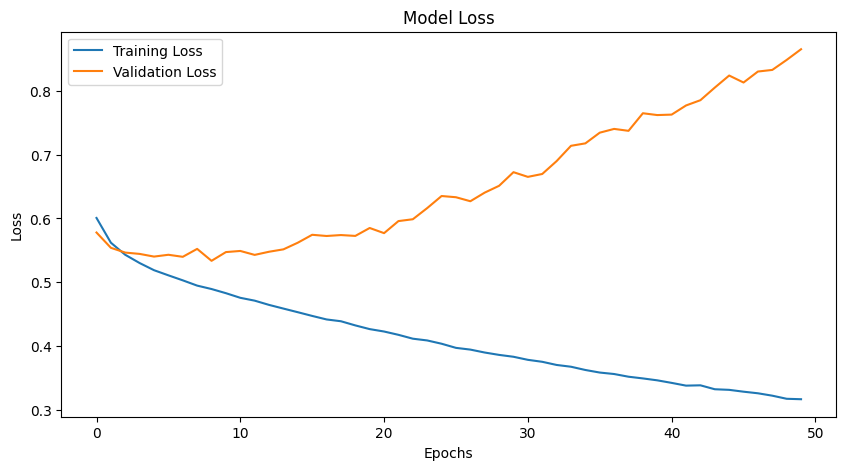

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# TensorFlow Classifier:

In [14]:
print('in')

in


# Plot The learning Curve for TensorFlow:

# Test Predections on The Test DataSet:

In [15]:
data_set = pd.read_csv('/kaggle/input/churn-dataset/p01_bank_data/bank_data_test.csv')
columns_to_keep = DataFrame.columns.tolist()
columns_to_keep.append('ID')
Test_DataFrame = data_set.loc[:, data_set.columns.isin(columns_to_keep)]
x_values = Test_DataFrame.drop(columns=['ID', 'TARGET'])
x_values.fillna(0, inplace=True)
scaler = StandardScaler()
x_values = pd.DataFrame(scaler.fit_transform(x_values), columns=x_values.columns)

y_pred = keras_model.predict(x_values)

FinalPredections = pd.DataFrame(columns=['ID', 'TARGET'])
FinalPredections['ID'] = Test_DataFrame['ID']
FinalPredections['TARGET'] = y_pred


FinalPredections.to_csv("/kaggle/working/predictions.csv", index=False)
FinalPredections.head()

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,ID,TARGET
0,400980,0.875841
1,525062,0.580678
2,280316,0.047367
3,496066,0.345359
4,375031,0.028108
